<a href="https://colab.research.google.com/github/Laraguy/Mareas/blob/main/TP5_MAREAS_LARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import find_peaks

## TP4 Analisis Armonico 
A partir de los datos del tp 4, para una serie temporal de mdp de 1986 obtuve, la amplitud y fase de 5 componentes de marea segun la tde  q ajustan bien a la serie temp 


## Análisis Armónico

Si consideramos que el nivel del mar observado puede ser expresado como:

$$h(t)=S_0+\sum_{i=1}^{Q} R_i \cos(\sigma_it-\alpha_i)$$

Con $S_0$ es el nivel medio del mar (considerado constante).
$R_i$, $\sigma_i$ y $\alpha_i$ son la amplitud, a frecuencia angular (de la TdE) y la fase de cada armónico.



In [ ]:
Ri= [34.3833,   8.2292,   9.3654,  15.3923,  21.6777] #Amplitudes
ai = [25.1643, 296.2584,  19.3946,  16.0715, 292.6832] #Fase


## TP5 
A partir de la serie temporal para mdp 
busco las constantes armonicas Hi y Ki amplitud del sitio y epoca respectivamente 
A partir de los factores nodales y argumento de equilibrio, para cada componente y cada tiempo

In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/f_5_MdP.csv
fn=pd.read_csv(r'f_5_MdP.csv')
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/vu_5_MdP.csv
vu=pd.read_csv(r'vu_5_MdP.csv')
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/5_MdP.xlsx
mdp=pd.read_excel(r'5_MdP.xlsx')

--2022-11-11 18:46:44--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/f_5_MdP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221956 (217K) [text/plain]
Saving to: ‘f_5_MdP.csv’

f_5_MdP.csv         100%[===================>] 216.75K  --.-KB/s    in 0.03s   

2022-11-11 18:46:45 (8.18 MB/s) - ‘f_5_MdP.csv’ saved [221956/221956]

--2022-11-11 18:46:45--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/vu_5_MdP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224061 (219K) [text/plain]
Saving to: ‘vu_5_

In [ ]:
mdp

,FECHA,OBS
0,1986-04-01 00:00:00,186
1,1986-04-01 01:00:00,171
2,1986-04-01 02:00:00,146
3,1986-04-01 03:00:00,115
4,1986-04-01 04:00:00,90
...,...,...
1099,1986-05-16 19:00:00,59
1100,1986-05-16 20:00:00,78
1101,1986-05-16 21:00:00,94
1102,1986-05-16 22:00:00,115


In [ ]:
vu.columns= [ "M2", "S2", "N2", "K2","K1", "O1", "P1","M4"]

In [ ]:
fn.columns= [ "M2", "S2", "N2", "K2","K1", "O1", "P1","M4"]

In [ ]:
fn_r= fn.drop(['K2', 'P1', 'M4'], axis=1)
fn_r

,M2,S2,N2,K1,O1
0,0.968466,1.0,0.968466,1.100454,1.162454
1,0.968465,1.0,0.968465,1.100456,1.162457
2,0.968465,1.0,0.968465,1.100458,1.162460
3,0.968464,1.0,0.968464,1.100460,1.162463
4,0.968463,1.0,0.968463,1.100461,1.162466
...,...,...,...,...,...
1099,0.967693,1.0,0.967693,1.102303,1.165488
1100,0.967692,1.0,0.967692,1.102304,1.165491
1101,0.967692,1.0,0.967692,1.102306,1.165493
1102,0.967691,1.0,0.967691,1.102307,1.165496


In [ ]:
vu_r= vu.drop(['K2', 'P1', 'M4'], axis=1)
vu_r

,M2,S2,N2,K1,O1
0,-2.729398,1.056577e-11,-3.130610,1.658668,-4.359664
1,-2.223529,5.235988e-01,-2.634242,1.921189,-4.116317
2,-1.717660,1.047198e+00,-2.137874,2.183710,-3.872971
3,-1.211790,1.570796e+00,-1.641506,2.446231,-3.629624
4,-0.705921,2.094395e+00,-1.145137,2.708752,-3.386278
...,...,...,...,...,...
1099,0.300658,3.665191e+00,2.024073,1.142596,-0.815680
1100,0.806527,4.188790e+00,2.520441,1.405117,-0.572333
1101,1.312396,4.712389e+00,3.016809,1.667638,-0.328987
1102,1.818266,5.235988e+00,3.513178,1.930158,-0.085641


In [ ]:
fn_r.describe()

,M2,S2,N2,K1,O1
count,1104.000000,1104.0,1104.000000,1104.000000,1104.000000
mean,0.968073,1.0,0.968073,1.101394,1.163997
std,0.000224,0.0,0.000224,0.000536,0.000880
min,0.967690,1.0,0.967690,1.100454,1.162454
25%,0.967879,1.0,0.967879,1.100932,1.163238
50%,0.968071,1.0,0.968071,1.101400,1.164007
75%,0.968267,1.0,0.968267,1.101859,1.164760
max,0.968466,1.0,0.968466,1.102309,1.165499


In [ ]:
vu_r.describe()

,M2,S2,N2,K1,O1
count,1104.000000,1.104000e+03,1104.000000,1104.000000,1104.000000
mean,0.565690,3.044841e+00,0.786634,2.016728,-0.200082
std,3.082877,1.824614e+00,3.270229,1.829203,3.193937
min,-6.228251,6.323830e-13,-6.265986,-1.474267,-6.262612
25%,-1.692937,1.570796e+00,-1.638147,0.449258,-2.648503
50%,0.719210,3.141593e+00,1.041528,2.013639,-0.258606
75%,2.921316,4.712389e+00,3.435204,3.580799,2.286737
max,6.248488,6.283185e+00,6.279995,5.553501,6.246015


In [ ]:
serie=pd.read_excel(r'5_MdP.xlsx',index_col=0)
series=mdp.OBS.values/100-mdp.OBS.mean()/100
dt= 1

In [ ]:
series

array([ 0.61673007,  0.46673007,  0.21673007, ..., -0.30326993,
       -0.09326993,  0.01673007])

In [ ]:
T=len(series)
T

1104

TENGO FACTOR NODAL fi y arg de Eq (v+u)i para cada tiempo:
           mdp_fn_r   y
           vu_r
           con analisis armonico por metodo de cuadrados minimos busco Hi y Ki 

In [ ]:
#(HKmh.H.iloc[i+1])*f.iloc[:,i].values*np.cos(vu.iloc[:,i].values-np.deg2rad(HKmh.K.iloc[i+1]))

In [ ]:
def AnAr(series,vu_r,fn_r):
  T=len(series)
  Q=len(fn_r.T)
  s=series#[0:(T-1+T%2)] #En caso de que sea par, tiramos el último
  T=len(s)
  eleA=[]
  eleB=[]
  for i in range(Q):
    eleA.append(fn_r.iloc[:,i].values*np.cos(vu_r.iloc[:,i].values))
    eleB.append(fn_r.iloc[:,i].values*np.sin(vu_r.iloc[:,i].values))
  eleA=np.array(eleA)
  eleB=np.array(eleB)
  ELE=np.concatenate((eleA.T,eleB.T),axis=1)
  vemosELE=np.linalg.lstsq(ELE,s,rcond=None)
  H=np.around(np.sqrt(vemosELE[0][0:Q]**2+vemosELE[0][Q::]**2),4)
  K=np.around(np.arctan2(vemosELE[0][Q::],vemosELE[0][0:Q]),4)
  K=K*180/np.pi
  K[K<0]=K[K<0]+360
  K=np.around(K,4)
  return(H,K)


In [ ]:
H, K= AnAr(series,vu_r,fn_r)

In [ ]:
H, K

(array([0.3597, 0.0844, 0.1034, 0.1392, 0.1888]),
 array([214.3026, 277.1045, 191.2926, 103.797 ,  36.0104]))

In [ ]:
fechas_pred_2=pd.date_range("1986-04-01 00:00:00", periods=len(fn_r), freq= "H")
fechas_pred_2

DatetimeIndex(['1986-04-01 00:00:00', '1986-04-01 01:00:00',
               '1986-04-01 02:00:00', '1986-04-01 03:00:00',
               '1986-04-01 04:00:00', '1986-04-01 05:00:00',
               '1986-04-01 06:00:00', '1986-04-01 07:00:00',
               '1986-04-01 08:00:00', '1986-04-01 09:00:00',
               ...
               '1986-05-16 14:00:00', '1986-05-16 15:00:00',
               '1986-05-16 16:00:00', '1986-05-16 17:00:00',
               '1986-05-16 18:00:00', '1986-05-16 19:00:00',
               '1986-05-16 20:00:00', '1986-05-16 21:00:00',
               '1986-05-16 22:00:00', '1986-05-16 23:00:00'],
              dtype='datetime64[ns]', length=1104, freq='H')

In [ ]:
H, K

(array([0.3597, 0.0844, 0.1034, 0.1392, 0.1888]),
 array([214.3026, 277.1045, 191.2926, 103.797 ,  36.0104]))

In [ ]:
Q=len(H)
ondas=pd.DataFrame()
for i in range(Q):
  ondas.insert(i,i,(H[i]*(fn_r.iloc[:,i].values)*np.cos(vu_r.iloc[:,i].values-np.deg2rad(K[i]))))
suma=ondas.sum(axis=1).values 
prediccion_2=pd.DataFrame(np.around(suma,4),index=fechas_pred_2,columns=['pred']) 

In [ ]:
prediccion_2

,pred
1986-04-01 00:00:00,0.6623
1986-04-01 01:00:00,0.5526
1986-04-01 02:00:00,0.3350
1986-04-01 03:00:00,0.0525
1986-04-01 04:00:00,-0.2375
...,...
1986-05-16 19:00:00,-0.1264
1986-05-16 20:00:00,0.0156
1986-05-16 21:00:00,0.1941
1986-05-16 22:00:00,0.3752


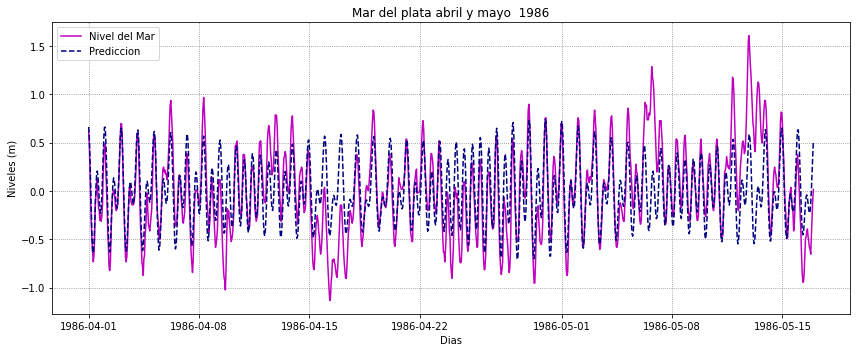

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(prediccion_2.index,serie/100-serie.mean()/100,'m')
ax.plot(prediccion_2.index,prediccion_2.pred.values,"--", color="navy")
ax.set(ylabel="Niveles (m)",xlabel= "Dias", title='Mar del plata abril y mayo  1986')
#ax.xaxis.set_minor_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['Nivel del Mar','Prediccion'])
plt.tight_layout()

##PREDICCION! 


In [ ]:
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/f_Lara.csv
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/vu_Lara.csv
vu_Lara= pd.read_csv(r"vu_Lara.csv") #ta en radianes
fn_Lara=pd.read_csv(r'f_Lara.csv')


--2022-11-11 18:46:47--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/f_Lara.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9738 (9.5K) [text/plain]
Saving to: ‘f_Lara.csv’

f_Lara.csv          100%[===================>]   9.51K  --.-KB/s    in 0s      

2022-11-11 18:46:47 (56.9 MB/s) - ‘f_Lara.csv’ saved [9738/9738]

--2022-11-11 18:46:47--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/vu_Lara.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9753 (9.5K) [text/plain]
Saving to: ‘vu_Lara.csv’

vu_

In [ ]:
fn_Lara

,# ['M2','S2','N2','K2','K1','O1','P1','M4']info horaria con inicio19/10/202200:00
0,0.973569,1.0,0.973569,1.229806,1.087985,1.142042,1.0,0.947836
1,0.973568,1.0,0.973568,1.229814,1.087987,1.142046,1.0,0.947834
2,0.973567,1.0,0.973567,1.229822,1.087990,1.142050,1.0,0.947832
3,0.973566,1.0,0.973566,1.229830,1.087992,1.142054,1.0,0.947830
4,0.973565,1.0,0.973565,1.229838,1.087995,1.142058,1.0,0.947828
5,0.973564,1.0,0.973564,1.229846,1.087997,1.142062,1.0,0.947827
6,0.973563,1.0,0.973563,1.229855,1.088000,1.142066,1.0,0.947825
7,0.973562,1.0,0.973562,1.229863,1.088002,1.142070,1.0,0.947823
8,0.973561,1.0,0.973561,1.229871,1.088004,1.142074,1.0,0.947821
9,0.973560,1.0,0.973560,1.229879,1.088007,1.142078,1.0,0.947819


In [ ]:
vu_Lara.columns= [ "M2", "S2", "N2", "K2","K1", "O1", "P1","M4"]

In [ ]:
fn_Lara.columns= [ "M2", "S2", "N2", "K2","K1", "O1", "P1","M4"]

In [ ]:
fn_rLara= fn_Lara.drop(['K2', 'P1', 'M4'], axis=1)
fn_rLara

,M2,S2,N2,K1,O1
0,0.973569,1.0,0.973569,1.087985,1.142042
1,0.973568,1.0,0.973568,1.087987,1.142046
2,0.973567,1.0,0.973567,1.087990,1.142050
3,0.973566,1.0,0.973566,1.087992,1.142054
4,0.973565,1.0,0.973565,1.087995,1.142058
5,0.973564,1.0,0.973564,1.087997,1.142062
6,0.973563,1.0,0.973563,1.088000,1.142066
7,0.973562,1.0,0.973562,1.088002,1.142070
8,0.973561,1.0,0.973561,1.088004,1.142074
9,0.973560,1.0,0.973560,1.088007,1.142078


In [ ]:
vu_rLara= vu_Lara.drop(['K2', 'P1', 'M4'], axis=1)
vu_rLara

,M2,S2,N2,K1,O1
0,2.621783,6.078693e-11,5.402954,5.094970,3.849571
1,3.127652,5.235988e-01,5.899322,5.357491,4.092918
2,3.633521,1.047198e+00,0.112505,5.620011,4.336264
3,4.139391,1.570796e+00,0.608873,5.882531,4.579611
4,4.645260,2.094395e+00,1.105241,6.145052,4.822958
5,5.151129,2.617994e+00,1.601609,0.124387,5.066305
6,5.656998,3.141593e+00,2.097977,0.386907,5.309652
7,6.162867,3.665191e+00,2.594345,0.649427,5.552999
8,0.385551,4.188790e+00,3.090713,0.911948,5.796346
9,0.891420,4.712389e+00,3.587080,1.174468,6.039693


In [ ]:
fechas_pred=pd.date_range("19-10-22 00:00:00", periods=len(fn_rLara), freq= "H")
fechas_pred

DatetimeIndex(['2022-10-19 00:00:00', '2022-10-19 01:00:00',
               '2022-10-19 02:00:00', '2022-10-19 03:00:00',
               '2022-10-19 04:00:00', '2022-10-19 05:00:00',
               '2022-10-19 06:00:00', '2022-10-19 07:00:00',
               '2022-10-19 08:00:00', '2022-10-19 09:00:00',
               '2022-10-19 10:00:00', '2022-10-19 11:00:00',
               '2022-10-19 12:00:00', '2022-10-19 13:00:00',
               '2022-10-19 14:00:00', '2022-10-19 15:00:00',
               '2022-10-19 16:00:00', '2022-10-19 17:00:00',
               '2022-10-19 18:00:00', '2022-10-19 19:00:00',
               '2022-10-19 20:00:00', '2022-10-19 21:00:00',
               '2022-10-19 22:00:00', '2022-10-19 23:00:00',
               '2022-10-20 00:00:00', '2022-10-20 01:00:00',
               '2022-10-20 02:00:00', '2022-10-20 03:00:00',
               '2022-10-20 04:00:00', '2022-10-20 05:00:00',
               '2022-10-20 06:00:00', '2022-10-20 07:00:00',
               '2022-10-

In [ ]:
Q=len(H)
ondas=pd.DataFrame()
for i in range(Q):
  ondas.insert(i,i,(H[i]*(fn_rLara.iloc[:,i].values)*np.cos(vu_rLara.iloc[:,i].values-np.deg2rad(K[i]))))
suma=ondas.sum(axis=1).values 
prediccion=pd.DataFrame(np.around(suma,4),index=fechas_pred,columns=['pred']) 

In [ ]:
prediccion

,pred
2022-10-19 00:00:00,-0.2491
2022-10-19 01:00:00,-0.1742
2022-10-19 02:00:00,-0.1204
2022-10-19 03:00:00,-0.0927
2022-10-19 04:00:00,-0.0861
2022-10-19 05:00:00,-0.0879
2022-10-19 06:00:00,-0.0812
2022-10-19 07:00:00,-0.0511
2022-10-19 08:00:00,0.0117
2022-10-19 09:00:00,0.1065


In [ ]:
fechas_shm=["18-10-22 05:54:00","19-10-22 10:24:00","19-10-22 16:57:00","20-10-22 00:46:00","20-10-22 00:44:00","20-10-22 05:17:00", "20-10-22 12:03:00","20-10-22 19:37:00"]

In [ ]:
fechas_shm_1=["19-10-22 2:54:00","19-10-22 7:24:00","19-10-22 13:57:00","19-10-22 21:46:00","20-10-22 03:44:00","20-10-22 8:17:00", "20-10-22 15:03:00","20-10-22 22:37:00"]

In [ ]:
pyb_shm= np.array([0.92,0.67,1.30,0.41,0.91,0.69,1.30,0.40])-0.91

In [ ]:
tabla=pd.DataFrame(data=pyb_shm,index=pd.to_datetime(fechas_shm_1),columns=['PyB'])

In [ ]:
tabla_1=pd.DataFrame(data=pyb_shm,index=pd.to_datetime(fechas_shm_1),columns=['PyB'])

In [ ]:
tabla

,PyB
2022-10-19 02:54:00,0.01
2022-10-19 07:24:00,-0.24
2022-10-19 13:57:00,0.39
2022-10-19 21:46:00,-0.50
2022-10-20 03:44:00,0.00
2022-10-20 08:17:00,-0.22
2022-10-20 15:03:00,0.39
2022-10-20 22:37:00,-0.51


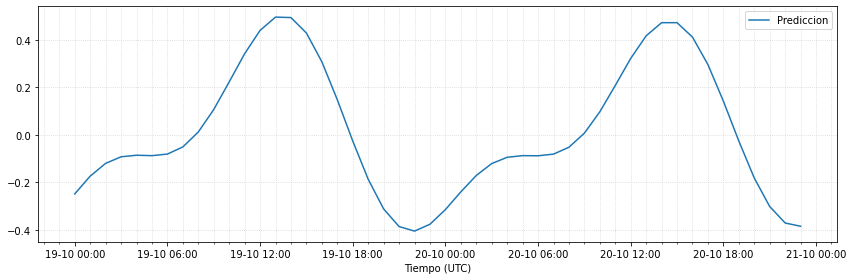

In [ ]:
import matplotlib.dates as mdates
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(prediccion.index,prediccion.pred)
#axs.plot(tabla,"o" )
axs.xaxis.set_major_locator(mdates.HourLocator([0,6,12,18]))
axs.xaxis.set_minor_locator(mdates.HourLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs.grid(color='lightgrey',linestyle=':',which='both')
axs.set(xlabel='Tiempo (UTC)')
axs.legend(["Prediccion","Datos SHN"])
plt.tight_layout()

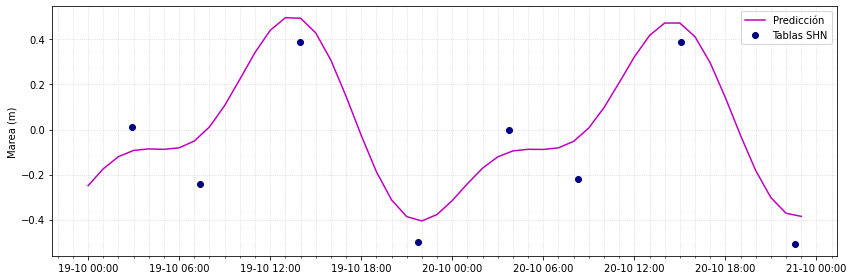

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(prediccion.pred, color="m")
axs.plot(tabla,'ro', color="navy")
axs.set(ylabel='Marea (m)')
axs.xaxis.set_major_locator(mdates.HourLocator([0,6,12,18]))
axs.xaxis.set_minor_locator(mdates.HourLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs.grid(color='lightgrey',linestyle=':',which='both')
axs.legend(['Predicción','Tablas SHN'])
plt.tight_layout()

In [ ]:
posicion=find_peaks(prediccion.pred,prominence= 0.0005)[0]
altas=prediccion.pred.iloc[posicion]
altas

2022-10-19 04:00:00   -0.0861
2022-10-19 13:00:00    0.4960
2022-10-20 05:00:00   -0.0878
2022-10-20 14:00:00    0.4725
Name: pred, dtype: float64

In [ ]:
posicion_2=find_peaks(-prediccion.pred,prominence= 0.0005)[0]
bajas=prediccion.pred.iloc[posicion_2]
bajas

2022-10-19 05:00:00   -0.0879
2022-10-19 22:00:00   -0.4058
2022-10-20 06:00:00   -0.0884
Name: pred, dtype: float64

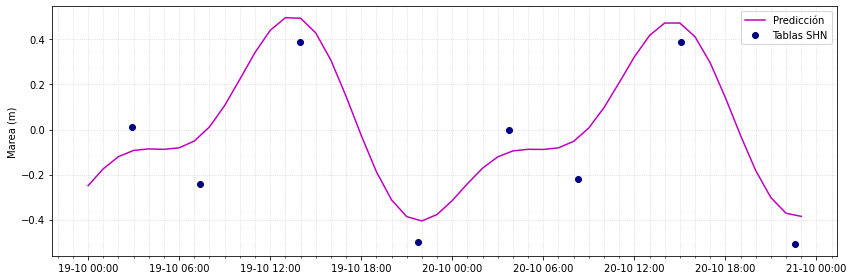

In [ ]:
fig, axs=plt.subplots(1,1,figsize=(12,4))
axs.plot(prediccion.pred, color="m")
axs.plot(tabla_1,'ro', color="navy")
#axs.plot(altas,'ro', color="coral")
#axs.plot(bajas,'ro', color="r")
axs.set(ylabel='Marea (m)')
axs.xaxis.set_major_locator(mdates.HourLocator([0,6,12,18]))
axs.xaxis.set_minor_locator(mdates.HourLocator())
axs.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axs.grid(color='lightgrey',linestyle=':',which='both')
axs.legend(['Predicción','Tablas SHN'])
plt.tight_layout()

##PREDICCION MU 
